In [1]:
import sys
import torch
import torchvision as tvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
"""path = os.getcwd()
path = os.path.join(path, "imgset/archive/fruits-360-original-size/fruits-360-original-size/Training")
for filename in os.listdir(path):
    #print(filename)
    pathin = os.path.join(path, filename)
    for i in os.listdir(os.path.join(path, filename)):
        if i is None:
            continue
        with Image.open(os.path.join(pathin, i)) as im:
            im.show()
        break"""

'path = os.getcwd()\npath = os.path.join(path, "imgset/archive/fruits-360-original-size/fruits-360-original-size/Training")\nfor filename in os.listdir(path):\n    #print(filename)\n    pathin = os.path.join(path, filename)\n    for i in os.listdir(os.path.join(path, filename)):\n        if i is None:\n            continue\n        with Image.open(os.path.join(pathin, i)) as im:\n            im.show()\n        break'

In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import *
path = os.path.join(os.getcwd(), "imgset/archive/fruits-360_dataset/fruits-360/")
print(path)

transforms = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.ImageFolder(root=path+"Training", transform=transforms)
test_dataset = datasets.ImageFolder(root=path+"Test", transform=transforms)

/Users/KerimErekmen/Desktop/chesstwitter/imgset/archive/fruits-360_dataset/fruits-360/


In [13]:
train_loader = DataLoader(train_dataset, 32, True)
test_loader = DataLoader(test_dataset, 32, True)

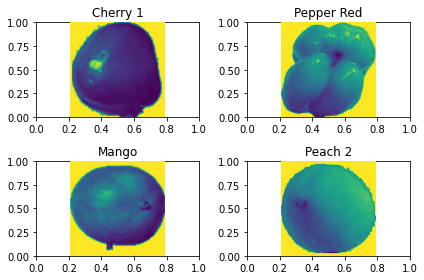

In [14]:
fig, axs = plt.subplots(2, 2)
import numpy as np
rows, cols = 2, 2
for i in range(1, (2*2)+1):
    ra = np.random.randint(0, len(train_dataset)-1)
    _, label  = train_dataset[ra]
    img = train_dataset[ra][0][0]
    fig.add_subplot(rows, cols, i)
    plt.title(train_dataset.classes[label])
    plt.axis("off")
    fig.tight_layout()
    plt.imshow(img.numpy())
plt.show()


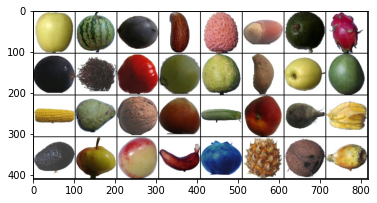

In [15]:
imgs, labels = next(iter(train_loader))
out = tvision.utils.make_grid(imgs)

plt.imshow(out.numpy().transpose((1, 2, 0)))

In [16]:
img.shape

torch.Size([100, 100])

In [17]:
"""for img, label in train_loader:
    print(img.shape, label.shape)"""

'for img, label in train_loader:\n    print(img.shape, label.shape)'

In [18]:
model = tvision.models.resnet18(True)
#freeze params
for param in model.parameters():
    param.requieres_grad = False


data, target_ = next(iter(train_loader))
print(data.size(), target_.size(), target_[0], len(train_loader.dataset.classes))

num_fipl = model.fc.in_features
model.fc = nn.Linear(num_fipl, len(train_dataset.classes))


optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

"""for i in range(len(target_)):
    if target_[i] not in train_dataset.targets:
        print(train_dataset.classes[target_[i]])
"""

normal_list = [1, 2]
torch.tensor(normal_list) # keep datatype, when float use .Tensor()

for data, target in train_loader:
    print(data.max(), target.max())
    break


torch.Size([32, 3, 100, 100]) torch.Size([32]) tensor(24) 131
tensor(1.) tensor(129)


In [19]:
from collections.abc import *

def zero(ls:list[int]):
    def one(func):
        def two(ls=ls):
            return [func(i,i) for i in ls]
        return two
    return one

@zero([1, 2, 3])
def add(a: int, b: int) -> int:
    return a+b

add([1, 2])

[2, 4]

In [20]:
epochs_final = 2
train_acc = []
train_loss = []
total_step = len(train_loader)
val_min = np.inf


def train(model=model, criterion=criterion, optim=optimizer, train_loader=train_loader, test_loader=test_loader, epochs=epochs_final):
    # print loss every run
    # print entire training loss per batch
    # print acc per batch
    for epoch in range(epochs_final):
        running_loss = 0
        running_score = 0
        total = 0

        print("Epoch {}".format(epoch))
        for i, (data, target) in enumerate(train_loader):

            optimizer.zero_grad()
            outputs = model(data) # torch.Size([256, 131]) i.e. 128 predicitons
            
            _, prediction = torch.max(outputs, 1)
            #print(prediction.shape)
            
            #print(target, outputs)
            #print("output {} and tar {}".format(outputs.shape, target.shape))
            #print(outputs.max(), target.max())
            
            loss = criterion(outputs, target)
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            running_score += torch.sum(prediction==target).item()
            total += target.size(0)

            if i % 5 == 0:
                print("Epoch [{}/{}], Step [{}/{}], Loss {:.5f}".format(epoch, epochs_final, 
                i, total_step, loss.item()))

            #print(prediciton.shape, target.shape)
            #print(current_loss)

        train_acc.append(running_score/total * 100)
        train_loss.append(running_loss/total_step)

        print("Train_Acc {} ---- Train_loss {}".format(running_score/total * 100, np.mean(tain_loss)))
        batch_loss = 0
        total_t=0
        correct_t=0

        with torch.no_grad():
            model.eval()
            for data, target in (test_dataloader):
                outputs = model(data)
                loss_t = criterion(outputs, target)
                batch_loss += loss_t.item()
                _, pred = torch.max(outputs, dim=1)
                correct_t += torch.sum(pred==target).item()
                total_t += target.size(0)
            val_acc.append(100 * correct_t/total_t)
            val_loss.append(batch_loss/len(test_dataloader))
            network_learned = batch_loss < val_min
            print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

            
            if network_learned:
                val_min = batch_loss
                torch.save(model.state_dict(), 'resnet.pt')
                print('Improvement-Detected, save-model')
        model.train() # activate grad


In [21]:
train()

Epoch 0
Epoch [0/2], Step [0/2116], Loss 5.19344
Epoch [0/2], Step [5/2116], Loss 3.55224
Epoch [0/2], Step [10/2116], Loss 4.14397
Epoch [0/2], Step [15/2116], Loss 3.54783
Epoch [0/2], Step [20/2116], Loss 3.09632
Epoch [0/2], Step [25/2116], Loss 3.43327
Epoch [0/2], Step [30/2116], Loss 1.80177
Epoch [0/2], Step [35/2116], Loss 1.95285
Epoch [0/2], Step [40/2116], Loss 1.34852
Epoch [0/2], Step [45/2116], Loss 1.43739
Epoch [0/2], Step [50/2116], Loss 1.26273
Epoch [0/2], Step [55/2116], Loss 0.92831
Epoch [0/2], Step [60/2116], Loss 1.29888
Epoch [0/2], Step [65/2116], Loss 0.82834
Epoch [0/2], Step [70/2116], Loss 0.80429
Epoch [0/2], Step [75/2116], Loss 0.80759
Epoch [0/2], Step [80/2116], Loss 0.67922
Epoch [0/2], Step [85/2116], Loss 0.87034
Epoch [0/2], Step [90/2116], Loss 0.62046
Epoch [0/2], Step [95/2116], Loss 0.64344
Epoch [0/2], Step [100/2116], Loss 0.39378
Epoch [0/2], Step [105/2116], Loss 0.44463
Epoch [0/2], Step [110/2116], Loss 0.57275
Epoch [0/2], Step [115/21

KeyboardInterrupt: 